In [541]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#modification du dossier par défaut
import os
os.chdir("C:\\Users\\YUE\\DATASC")

#importation des données
import pandas
proteine = pandas.read_table("proteine.txt",sep="\t",header=0,index_col=0)


In [542]:
#dimension des données
print(proteine.shape)

(25, 9)


In [543]:
#toutes les lignes des données
print(proteine.iloc[0:25,:])


               VR    VB  Oeufs  Lait  Poisson  Cereales  Amidon  Noix   FL
Pays                                                                      
Albanie      10.1   1.4    0.5   8.9      0.2      42.3     0.6   5.5  1.7
Autriche      8.9  14.0    4.3  19.9      2.1      28.0     3.6   1.3  4.3
Belgique     13.5   9.3    4.1  17.5      4.5      26.6     5.7   2.1  4.0
Bulgarie      7.8   6.0    1.6   8.3      1.2      56.7     1.1   3.7  4.2
Cheko         9.7  11.4    2.8  12.5      2.0      34.3     5.0   1.1  4.0
Danemark     10.6  10.8    3.7  25.0      9.9      21.9     4.8   0.7  2.4
Allemagne-E   8.4  11.6    3.7  11.1      5.4      24.6     6.5   0.8  3.6
Finlande      9.5   4.9    2.7  33.7      5.8      26.3     5.1   1.0  1.4
France       18.0   9.9    3.3  19.5      5.7      28.1     4.8   2.4  6.5
Grece        10.2   3.0    2.8  17.6      5.9      41.7     2.2   7.8  6.5
Hongrie       5.3  12.4    2.9   9.7      0.3      40.1     4.0   5.4  4.2
Irlande      13.9  10.0  

In [544]:
#statistiques descriptives
print(proteine.describe())


              VR         VB      Oeufs       Lait    Poisson   Cereales  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Amidon       Noix         FL  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min     0.600000   0.700000   1.400000  
25%     3.100000   1.500000   2.900000  
50%     4.700000   2.400000   3.800000  
75%     5.700000   4.700000   4.90000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295F8FA1108>,
      dtype=object)

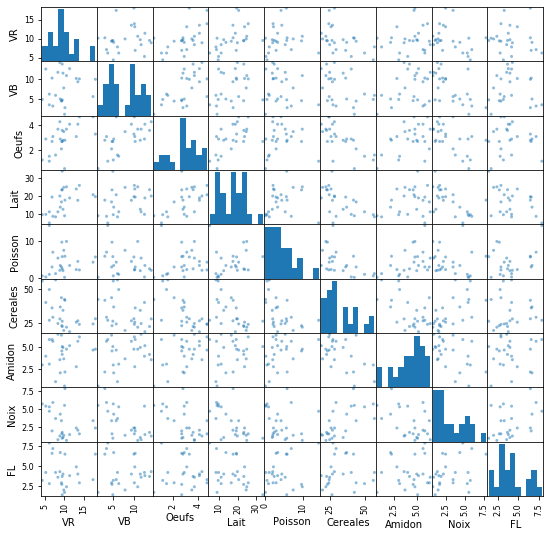

In [545]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix
scatter_matrix(proteine,figsize=(9,9))


In [546]:
################ CAH ####################################

In [547]:
#centrage réduction des données
from sklearn import preprocessing
proteine_cr = preprocessing.scale(proteine)
len(proteine_cr)

25

In [548]:
#librairies pour la CAH
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


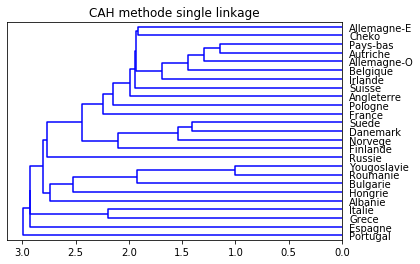

In [549]:
#générer la matrice des liens
W = linkage(proteine_cr,method='single',metric='euclidean')
#Z

#affichage du dendrogramme
plt.title("CAH methode single linkage")
dendrogram(W,labels=proteine.index,orientation='left',color_threshold=0)
plt.show()

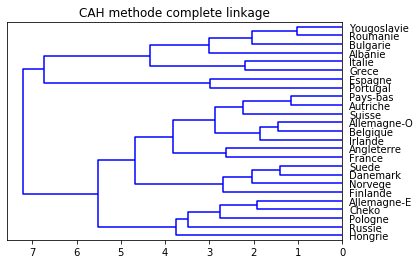

In [550]:
#générer la matrice des liens
W = linkage(proteine_cr,method='complete',metric='euclidean')
#Z

#affichage du dendrogramme
plt.title("CAH methode complete linkage")
dendrogram(W,labels=proteine.index,orientation='left',color_threshold=0)
plt.show()

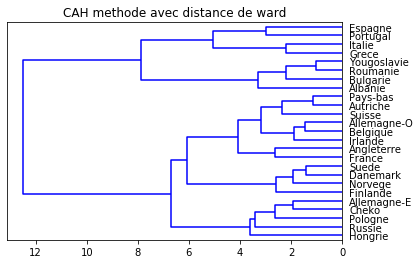

In [551]:
#générer la matrice des liens
W = linkage(proteine_cr,method='ward',metric='euclidean')
#W

#affichage du dendrogramme
plt.title("CAH methode avec distance de ward")
dendrogram(W,labels=proteine.index,orientation='left',color_threshold=0)
plt.show()


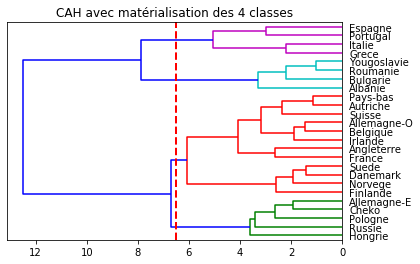

In [556]:
#matérialisation des 4 classes (hauteur t = 6.5)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(W,labels=proteine.index,orientation='left',color_threshold=6.5)
plt.axvline(x=6.5, c="r", ls="--", lw=2)
plt.show()


In [559]:
#découpage à la hauteur t = 6.5 ==> 4 identifiants de groupes obtenus
groupes_cah = fcluster(W,t=6.5,criterion='distance')
print(groupes_cah)


[3 2 2 3 1 2 1 2 2 4 1 2 4 2 2 1 4 3 4 2 2 2 1 2 3]


In [562]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pandas.DataFrame(proteine.index[idg],groupes_cah[idg]))


          Pays
1      Pologne
1       Russie
1        Cheko
1  Allemagne-E
1      Hongrie
2       France
2      Norvege
2     Pays-bas
2  Allemagne-O
2      Irlande
2        Suede
2       Suisse
2     Finlande
2     Danemark
2     Belgique
2     Autriche
2   Angleterre
3      Albanie
3  Yougoslavie
3     Roumanie
3     Bulgarie
4     Portugal
4        Grece
4      Espagne
4       Italie


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295FE3A0888>,
      dtype=object)

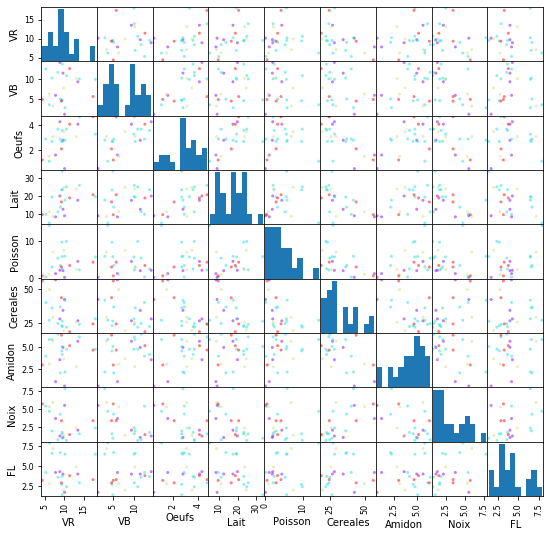

In [564]:
scatter_matrix(proteine,figsize=(9,9),c=groupes_cah[idg], cmap='rainbow' )

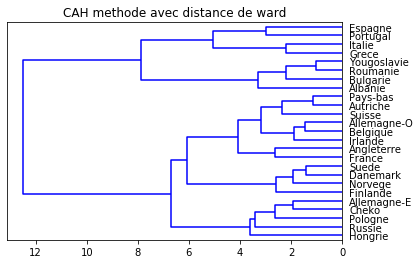

In [565]:
#générer la matrice des liens
W = linkage(proteine_cr,method='ward',metric='euclidean')
#W

#affichage du dendrogramme
plt.title("CAH methode avec distance de ward")
dendrogram(W,labels=proteine.index,orientation='left',color_threshold=0)
plt.show()

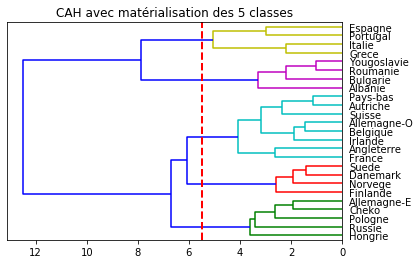

In [567]:
#matérialisation des 5 classes (hauteur t = 5.5)
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(W,labels=proteine.index,orientation='left',color_threshold=5.5)
plt.axvline(x=5.5, c="r", ls="--", lw=2)
plt.show()


In [568]:
#découpage à la hauteur t = 5.5 ==> 5 identifiants de groupes obtenus
groupes_cah = fcluster(W,t=5.5,criterion='distance')
print(groupes_cah)


[4 3 3 4 1 2 1 2 3 5 1 3 5 3 2 1 5 4 5 2 3 3 1 3 4]


In [569]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pandas.DataFrame(proteine.index[idg],groupes_cah[idg]))


          Pays
1      Pologne
1       Russie
1        Cheko
1  Allemagne-E
1      Hongrie
2        Suede
2      Norvege
2     Danemark
2     Finlande
3     Pays-bas
3  Allemagne-O
3       France
3   Angleterre
3       Suisse
3     Belgique
3     Autriche
3      Irlande
4      Albanie
4  Yougoslavie
4     Roumanie
4     Bulgarie
5     Portugal
5        Grece
5      Espagne
5       Italie


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295F8C51EC8>,
      dtype=object)

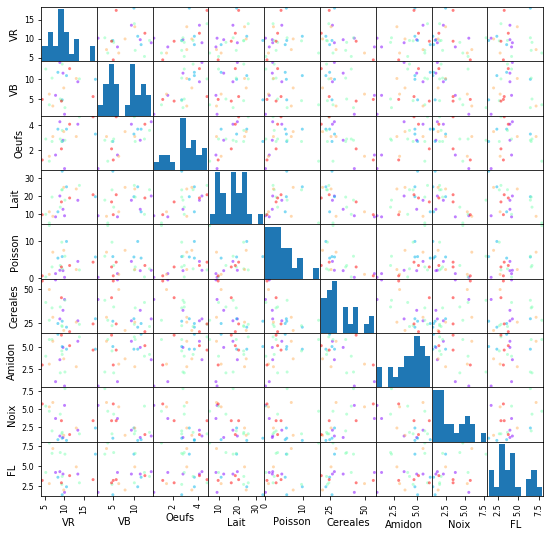

In [570]:
scatter_matrix(proteine,figsize=(9,9),c=groupes_cah[idg], cmap='rainbow' )

In [591]:
############# K MEANS ##########################

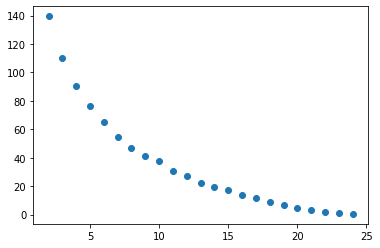

In [592]:
#k-means sur les données centrées et réduites
from sklearn import cluster

a=[]
for i in range(2,25):
    kmeans = cluster.KMeans(n_clusters=i) 
    kmeans.fit(proteine_cr) 
    a.append(kmeans.inertia_)
    
plt.scatter(range(2,25),a)

In [593]:
# paramété avec nombre classes 4
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(proteine_cr)

print(kmeans.inertia_)

90.88898096315461


In [594]:
# paramété avec nombre classes 5
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(proteine_cr)

print(kmeans.inertia_)

74.94105991048842


In [596]:
#index triés des groupes
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idk],kmeans.labels_[idk]))


             0
0     Autriche
0     Belgique
0   Angleterre
0       Suisse
0       France
0      Irlande
0  Allemagne-O
0     Pays-bas
1       Russie
1       Cheko.
1  Allemagne-E
1      Hongrie
1      Pologne
2      Albanie
2     Roumanie
2  Yougoslavie
2     Bulgarie
3        Suede
3     Finlande
3     Danemark
3      Norvege
4     Portugal
4        Grece
4      Espagne
4       Italie


In [597]:
#distances aux centres de classes des observations
print(kmeans.transform(proteine_cr))


[[5.97722735 5.11590414 2.01051138 5.91855933 4.8443865 ]
 [1.8803626  2.50639072 5.22743129 3.36336317 4.78942032]
 [1.00842194 2.37042396 5.32452519 2.71361936 4.11000532]
 [5.23824799 3.91049852 1.36667921 5.62168013 4.04862479]
 [2.27712084 1.11048046 4.13178169 3.3993514  4.07175421]
 [2.53292986 3.5206267  6.11398386 1.34228577 4.9955906 ]
 [2.571638   1.99317895 5.48484252 3.16230208 4.43753972]
 [3.43707776 3.91709805 5.5821605  1.57748339 5.30119614]
 [2.23147877 3.66282523 5.88499728 3.90553137 4.20756848]
 [4.75142949 4.36863294 3.70853673 5.15346974 2.17599485]
 [3.97054486 2.28726167 3.24005364 4.9594587  3.79942034]
 [1.6076813  3.37122457 6.23768869 2.96516279 5.46968193]
 [3.64587354 3.06886113 3.18263693 4.39600953 2.02146045]
 [1.56972903 2.46530136 5.26960912 2.75157859 4.76748533]
 [3.1460593  3.37303655 5.12561364 1.09337577 3.9134934 ]
 [2.96703951 1.6162503  4.62294088 3.76483684 3.42393796]
 [6.17529856 5.05109344 5.98175322 5.78156565 2.98840104]
 [4.84137986 3

In [598]:
#correspondance avec les groupes de la CAH
pandas.crosstab(groupes_cah,kmeans.labels_)


col_0,0,1,2,3,4
row_0,,,,,
1,0,5,0,0,0
2,0,0,0,4,0
3,8,0,0,0,0
4,0,0,4,0,0
5,0,0,0,0,4


In [599]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(proteine_cr)
    res[k] = metrics.silhouette_score(proteine_cr,km.labels_)

print(res)

[0.32710841 0.3351694  0.27085352 0.25877416 0.25639694 0.25121802
 0.24299848 0.22486939 0.21710283]


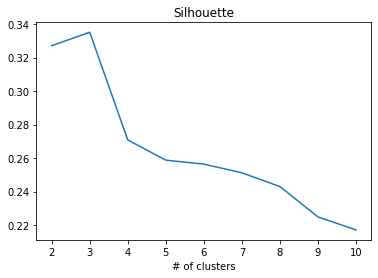

In [600]:
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()


In [601]:
#moyenne par variable
m = proteine.mean()
m

VR           9.828
VB           7.896
Oeufs        2.936
Lait        17.112
Poisson      4.284
Cereales    32.248
Amidon       4.276
Noix         3.072
FL           4.136
dtype: float64

In [602]:
#TSS
TSS = proteine.shape[0]*proteine.var(ddof=0)
print(TSS)


VR           268.8704
VB           327.5096
Oeufs         29.9776
Lait        1211.6864
Poisson      277.8536
Cereales    2890.7024
Amidon        64.0856
Noix          94.6304
FL            78.0976
dtype: float64


In [603]:
#data.frame conditionnellement aux groupes
gb = proteine.groupby(kmeans.labels_)

#effectifs conditionnels
nk = gb.size()
print(nk)


0    8
1    5
2    4
3    4
4    4
dtype: int64


In [604]:
#moyennes conditionnelles
mk = gb.mean()
print(mk)


        VR       VB   Oeufs     Lait  Poisson  Cereales  Amidon    Noix     FL
0  13.2125  10.6375  3.9875  21.1625    3.375    24.700   4.650  2.0625  4.175
1   7.9200  10.0400  2.8400  13.8400    2.740    35.740   5.560  2.5400  4.260
2   7.1250   4.6750  1.2000   9.4500    0.750    51.125   1.950  5.0500  2.975
3   9.8500   7.0500  3.1500  26.6750    8.225    22.675   4.550  1.1750  2.125
4   8.1250   3.8000  2.4750  11.2000    7.625    33.675   3.975  5.6750  7.075


In [605]:
#pour chaque groupe ecart à la moyenne par variable
EMk = (mk-m)**2

#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)


VR           150.66865
VB           194.58135
Oeufs         21.97935
Lait         925.21815
Poisson      175.26160
Cereales    2316.82790
Amidon        31.66610
Noix          66.71465
FL            56.20810
dtype: float64


In [606]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print(R2)


VR          0.560376
VB          0.594124
Oeufs       0.733192
Lait        0.763579
Poisson     0.630770
Cereales    0.801476
Amidon      0.494122
Noix        0.705002
FL          0.719716
dtype: float64


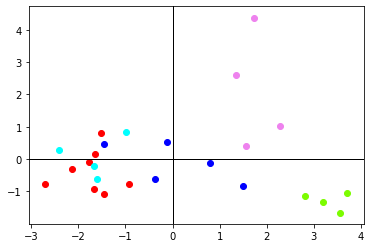

In [608]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(proteine_cr)

#projeter dans le plan factoriel
#avec un code couleur selon le groupe
for couleur,k in zip(['red','blue','lawngreen','aqua', 'violet'],[0,1,2,3,4]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.axvline(x=0, c="black", ls="-", lw=1)
plt.axhline(y=0, c="black", ls="-", lw=1)
plt.show()    


In [609]:
#retirer des observations le groupe n° des k-means
#c'est à dire Albanie, Bulgarie, Roumanie et Yougoslavie

proteine_subset = pandas.DataFrame()
for i in range(5):
    if i not in [2]: #ATTENTION! chaque fois son numéro de groupe change faut motifier manuellement
        proteine_subset =proteine_subset.append(proteine.iloc[kmeans.labels_==i, :])

print(proteine_subset.shape)

(21, 9)


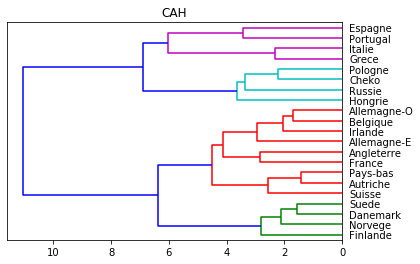

[2 2 2 2 2 2 2 2 3 2 3 3 3 1 1 1 1 4 4 4 4]


In [610]:
#centrer et réduire
proteine_subset_cr = preprocessing.scale(proteine_subset)

#générer la matrice des liens
Z_subset = linkage(proteine_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme
plt.title("CAH")
dendrogram(Z_subset,labels=proteine_subset.index,orientation='left',color_threshold=6.2) #6.2
plt.show()

#groupes
groupes_subset_cah = fcluster(Z_subset,t=6.2,criterion='distance')
print(groupes_subset_cah)


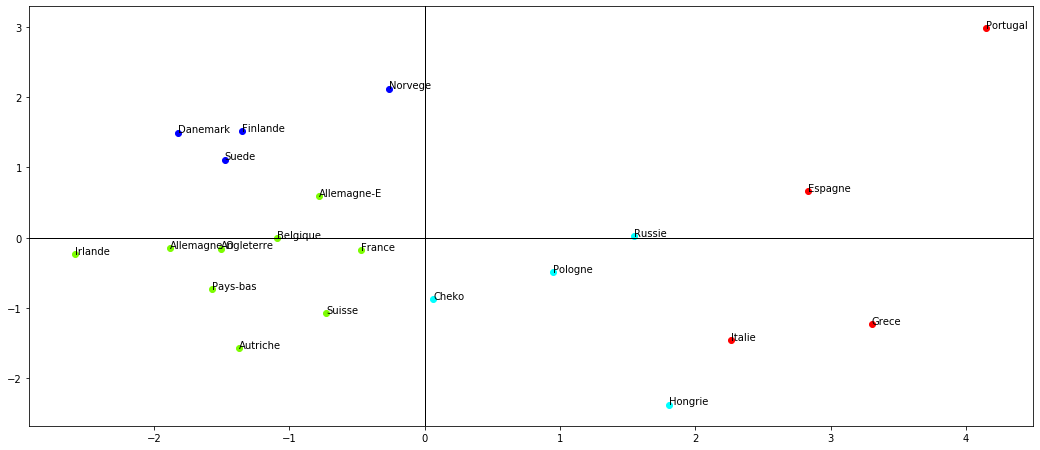

In [611]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(proteine_subset_cr)

#projeter dans le plan factoriel
#avec un code couleur selon le groupe
plt.figure(figsize=(18,7.715))
for couleur,k in zip(['blue','lawngreen','aqua', 'red'],[1,2,3,4]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)

#mettre les labels des points
for i,label in enumerate(proteine_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))

plt.axvline(x=0, c="black", ls="-", lw=1)
plt.axhline(y=0, c="black", ls="-", lw=1)
plt.show()  